In this notebook, we want to summarize the data and make sure that it is behaving as we expect based on previous literature. Here, we want to only use the outcome for multnom_out (which is TxE vs rHGG)

In [19]:
recgli = read.csv("../../ParseData/9thParse_researchPath_withInVivo.csv") 
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [20]:
table(recgli$multnom_out)
table(is.na(recgli$multnom_out))

recgli[which(is.na(recgli$phn_nlin) & !is.na(recgli$cbvn_nlin)),]


rHGG  TxE 
 239   83 


FALSE 
  322 

,b_number,t_number,sf_number,current_scan_date,current_surgery_date,current_hist_grade,current_hist_type,roi.label,tumor_cell_evaluation,necrosis,f8_delicate,f8_simple,f8_complex,mib_1,bx_pure_treatment_effect,nfse,nfl,nt1c,nt1v,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,nadc.2,nfa.2,nev1.2,nev2.2,nev3.2,nevrad.2,cbvn_nlin,phn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,laclip,nlac,olddata,newdata,comments,notes.,imaging_code,perf_quant,cbv_nlin,spec_quant,include_anat,include_diffu1000,include_diffu2000,include_diffu_all,include_perf,include_spec,include_one_advanced_mod,include_all_advanced_mods,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL,in_NEC,in_ROI,desired_hist,multnom_out,no_ffpe,waiting_on_path,rhgg_txe_analysis
11,2793,7584,8842,7/28/11,7/28/11,Grade IV,Glioblastoma,15B44,2,1,2,1,0,9.42,f,2.66,1.01,1.55,0.63,0.720000,0.5000000,0.630000,0.7000000,0.890000,0.790000,NA,1.28,2.67,2.31,2.16,2.30,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,1,1,0,0,1,0,22.50,0.00,NA,22.50,1,0,0,0,1,1,rHGG,0,0,1
16,963,6069,7984,3/24/09,3/25/09,Grade IV,Glioblastoma,18B24,3,0,2,3,0,26.85,f,3.20,1.48,0.98,NA,2.040000,0.7600000,1.880000,2.1800000,2.140000,2.210000,NA,NA,NA,NA,NA,NA,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,0,1,0,0,1,0,NA,NA,NA,NA,0,1,1,0,1,1,rHGG,0,0,1
20,2384,5603,7759,8/3/08,8/4/08,Grade III,Astrocytoma,21B18,2,0,2,2,0,5.02,f,1.86,1.38,1.63,0.67,1.470000,0.5400000,1.300000,1.4800000,1.820000,1.640000,NA,NA,NA,NA,NA,NA,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,0,1,0,0,1,0,100.00,0.00,NA,100.00,1,1,0,0,1,1,rHGG,0,0,1
21,2384,5603,7759,8/3/08,8/4/08,Grade III,Astrocytoma,22B18,2,0,2,0,0,1.43,f,1.92,1.24,1.44,0.59,0.910000,0.3600000,0.810000,0.9200000,1.110000,1.010000,NA,NA,NA,NA,NA,NA,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,0,1,0,0,1,0,66.67,14.29,NA,80.96,1,0,0,0,1,1,rHGG,0,0,1
24,3171,7553,8804,6/24/11,6/27/11,Treatment Effect,Treatment Effect,25B43,0,0,0,0,0,0.00,t,0.66,0.54,1.11,0.87,0.850000,1.7500000,1.040000,0.9000000,0.600000,0.800000,0.67,1.53,0.87,0.55,0.32,0.46,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,90% BV wall,NA,NA,all_zeros,NA,NA,1,1,1,1,0,0,1,0,NA,NA,NA,NA,0,0,0,0,0,1,TxE,0,0,1
25,2192,8070,7540,11/18/07,11/19/07,Grade IV,Glioblastoma,26B13,2,0,3,2,0,8.11,f,1.44,0.99,0.86,0.84,1.230000,1.0400000,1.130000,1.1700000,1.280000,1.270000,NA,NA,NA,NA,NA,NA,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,"necrosis on H&E<5%; PV tumor cells, on deeper sections ~20% of tissue is Tumor score=3",NA,NA,all_zeros,NA,NA,1,1,0,1,0,0,1,0,0.00,NA,NA,0.00,0,0,0,0,0,1,rHGG,0,0,1
43,3043,7227,8580,12/16/10,12/27/10,Treatment Effect,Treatment Effect,35B39,0,0,Indeterminable,Indeterminable,Indeterminable,0.00,f,1.51,1.32,0.95,0.81,1.830000,0.9400000,1.550000,1.7600000,2.250000,2.030000,1.57,1.09,1.54,1.49,1.61,1.55,0.00,NA,NA,NA,-1.62,-0.28,-1.47,0.19,0.23,0.65,0.29,0.60,0.31,1,0,"tiny, unable to fully evaluate",NA,NA,all_zeros,NA,0,1,1,1,1,0,1,1,0,0.00,50.00,NA,50.00,0,1,1,0,1,1,TxE,0,0,1
50,1556,5535,7725,7/1/08,7/2/08,Grade IV,Glioblastoma,39B17,2,0,1,3,2,15.39,f,1.76,1.47,1.26,0.62,1.440000,0.8200000,1.260000,1.4900000,1.720000,1.620000,1.44,0.97,1.42,1.39,1.47,1.47,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,1,1,0,0,1,0,60.71,39.29,NA,100.00,1,1,0,0,1,1,rHGG,0,0,1
70,2842,6619,8243,2/12/10,2/16/10,Grade IV,Glioblastoma,53B31,0,0,3,0,0,0.60,t,2.48,1.76,2.30,0.60,2.490000,0.7000000,2.150000,2.4400000,3.240000,2.870000,2.69,0.92,2.48,2.63,2.80,2.82,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,1,1,0,0,1,0,96.55,0.00,0.0,96.55,1,1,0,0,1,1,TxE,0,0,1
72,2842,6619,8243,2/12/10,2/16/10,Grade IV,Glioblastoma,55B31,0,0,3,0,0,0.64,t,1.90,2.48,0.90,0.87,1.620000,0.6300000,1.350000,1.6400000,2.140000,1.940000,1.55,0.97,1.45,1.43,1.75,1.63,0.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,0,,NA,NA,all_zeros,NA,NA,1,1,1,1,0,0,1,0,0.00,68.97,0.0,68.97,0,1,1,0,1,1

In [3]:
library(lme4)
library(geepack)
library(glmm)
library(ez)

Loading required package: Matrix
Loading required package: trust
Loading required package: mvtnorm
Loading required package: digest


#### In this notebook, we want to find: <br>
1. Diffusion params vs. TxE/rHGG designation using <br>
    a. No separation into ROIs <br>
    b. Visual comparison of Diffusion params in separate regions <br>
    c. Use GLMM associate Diffusion parameters with TS, no separation <br>
    d. Use GEE to associate Diffusion parameters with TS, no separation <br>
    e. Use GLMM to associate Diffusion parameters with TS, separating into CEL & NEL <br>
    f. Use GEE to associate Diffusion parameters with TS, separating into CEL & NEL <br>
2. Combining Diffusion parameters to look at different associations <br>
a. in GLMM <br>
b. in GEE <br>
3. Using in_CEL as a covariate in diffu params <br>
a. in GLMM <br> 
b. in GEE <br> 



## 1. Perfusion vs. rHGG/TxE

### a. No separation into ROIs 

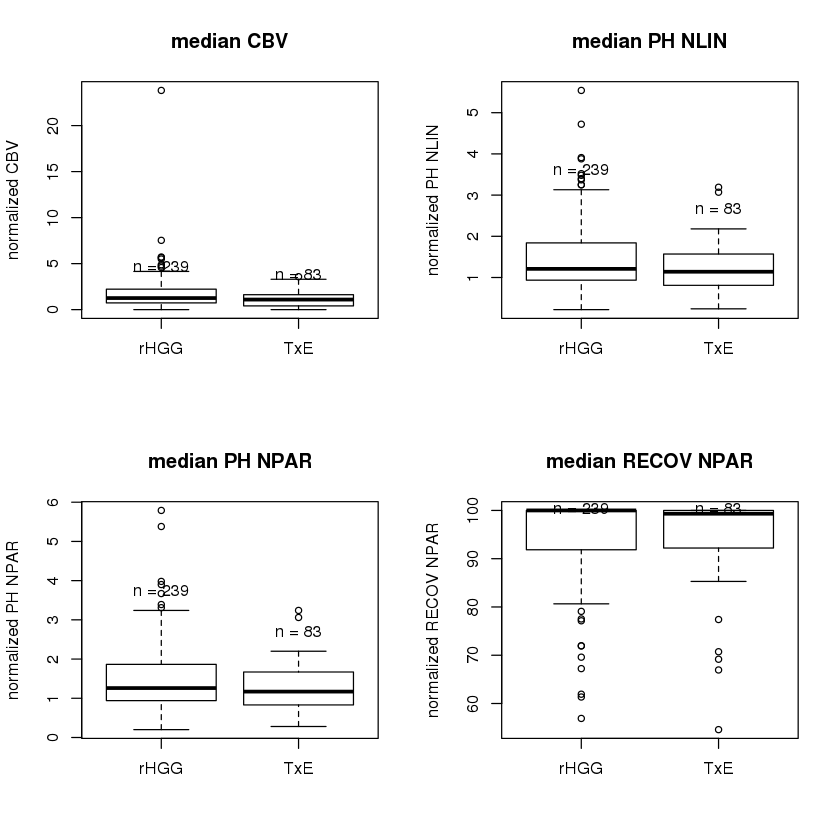

In [5]:
par(mfrow = c(2, 2))
a = boxplot(cbvn_nlin ~ multnom_out , data = recgli, ylab = "normalized CBV", main = "median CBV")
text( c(1:nlevels(factor(recgli$multnom_out))) , a$stats[nrow(a$stats) , ]+0.5 , paste("n = ",table(recgli$multnom_out),sep="")  )

b = boxplot(phn_nlin ~ multnom_out , data = recgli, ylab = "normalized PH NLIN", main = "median PH NLIN")
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , b$stats[nrow(b$stats) , ]+0.5 , paste("n = ",table(recgli$multnom_out),sep="")  )

c = boxplot(phn_npar ~ multnom_out , data = recgli, ylab = "normalized PH NPAR", main = "median PH NPAR")
text( c(1:nlevels(factor(recgli$multnom_out))) , c$stats[nrow(c$stats) , ]+0.5 , paste("n = ",table(recgli$multnom_out),sep="")  )

d = boxplot(recovn_npar ~ multnom_out , data = recgli, ylab = "normalized RECOV NPAR", main = "median RECOV NPAR")
text( c(1:nlevels(factor(recgli$multnom_out))) , d$stats[nrow(d$stats) , ]+0.5 , paste("n = ",table(recgli$multnom_out),sep="")  )


### b. CEL next to NEL scores: 

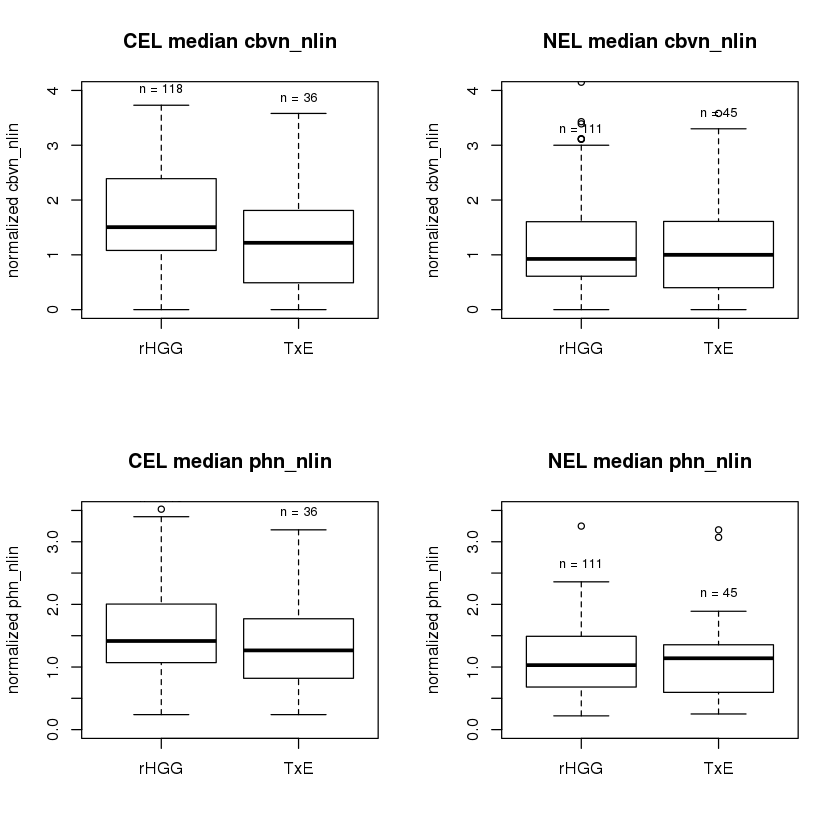

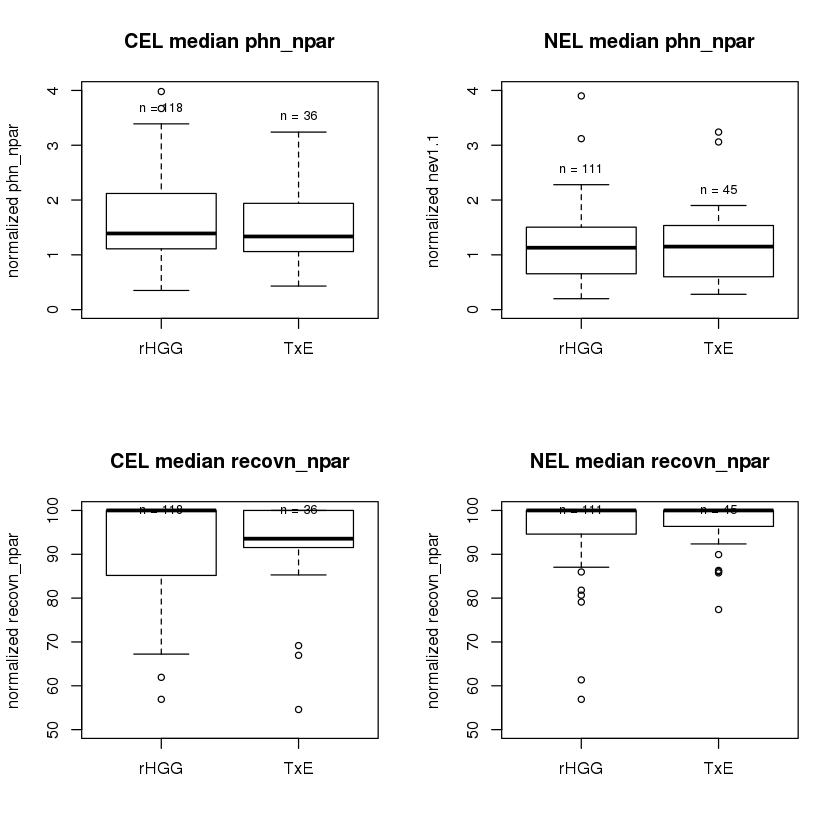

In [9]:
par(mfrow = c(2, 2))
a = boxplot(cbvn_nlin ~ multnom_out , data = recgli[recgli$in_CEL ==1,], ylab = "normalized cbvn_nlin", main = "CEL median cbvn_nlin", ylim = c(0,4))
text( c(1:nlevels(factor(recgli$multnom_out))) , a$stats[nrow(a$stats) , ]+.3 , paste("n = ",table(recgli[which(recgli$in_CEL ==1),]$multnom_out),sep=""), cex = 0.8)
b = boxplot(cbvn_nlin ~ multnom_out , data = recgli[recgli$in_NEL ==1,], ylab = "normalized cbvn_nlin", main = "NEL median cbvn_nlin", ylim = c(0,4))
text( c(1:nlevels(factor(recgli$multnom_out))) , b$stats[nrow(b$stats) , ]+.3 , paste("n = ",table(recgli[which(recgli$in_NEL ==1),]$multnom_out),sep=""), cex = 0.8)

c = boxplot(phn_nlin ~ multnom_out , data = recgli[recgli$in_CEL ==1,], ylab = "normalized phn_nlin", main = "CEL median phn_nlin", ylim = c(0,3.5))
text( c(1:nlevels(factor(recgli$multnom_out))) , c$stats[nrow(c$stats) , ]+.3 , paste("n = ",table(recgli[which(recgli$in_CEL ==1),]$multnom_out),sep=""), cex = 0.8)
d = boxplot(phn_nlin ~ multnom_out , data = recgli[recgli$in_NEL ==1,], ylab = "normalized phn_nlin", main = "NEL median phn_nlin", ylim = c(0,3.5))
text( c(1:nlevels(factor(recgli$multnom_out))) , d$stats[nrow(d$stats) , ]+.3 , paste("n = ",table(recgli[which(recgli$in_NEL ==1),]$multnom_out),sep=""), cex = 0.8)

e = boxplot(phn_npar ~ multnom_out , data = recgli[recgli$in_CEL ==1,], ylab = "normalized phn_npar", main = "CEL median phn_npar", ylim = c(0,4))
text( c(1:nlevels(factor(recgli$multnom_out))) , e$stats[nrow(e$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$multnom_out),sep=""), cex = 0.8)
f = boxplot(phn_npar ~ multnom_out , data = recgli[recgli$in_NEL ==1,], ylab = "normalized nev1.1", main = "NEL median phn_npar", ylim = c(0,4))
text( c(1:nlevels(factor(recgli$multnom_out))) , f$stats[nrow(f$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$multnom_out),sep=""), cex = 0.8)

g = boxplot(recovn_npar ~ multnom_out , data = recgli[recgli$in_CEL ==1,], ylab = "normalized recovn_npar", main = "CEL median recovn_npar", ylim = c(50, 100))
text( c(1:nlevels(factor(recgli$multnom_out))) , g$stats[nrow(g$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$multnom_out),sep=""), cex = 0.8)
h = boxplot(recovn_npar ~ multnom_out , data = recgli[recgli$in_NEL ==1,], ylab = "normalized recovn_npar", main = "NEL median recovn_npar", ylim = c(50, 100))
text( c(1:nlevels(factor(recgli$multnom_out))) , h$stats[nrow(h$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$multnom_out),sep=""), cex = 0.8)


### c. Use GLMM associate perfusion parameters with rHGG/TxE, no separation 

In [10]:
cbvn_nlin.glmm.fit = glmer(multnom_out ~ cbvn_nlin + (1|t_number), data = recgli, family="binomial")
round(summary(cbvn_nlin.glmm.fit)$coefficients, 4) 

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-9.1242,1.2737,-7.1637,0.0000
cbvn_nlin,0.1033,0.2083,0.4957,0.6201


In [11]:
phn_nlin.glmm.fit = glmer(multnom_out ~ phn_nlin + (1|t_number), data = recgli, family="binomial")
round(summary(phn_nlin.glmm.fit)$coefficients, 4) 

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-10.0022,1.8928,-5.2843,0.0000
phn_nlin,0.1737,0.7401,0.2348,0.8144


In [ ]:
phn_nlin.glmm.fit = glmer(multnom_out ~ phn_nlin + (1|t_number), data = recgli, family="binomial")
round(summary(phn_nlin.glmm.fit)$coefficients, 4) 